<a href="https://colab.research.google.com/github/YigitBCesur/Finance-and-Trading/blob/main/Correlation_between_Commodities_Indexes_Treasure_VIX_BitCoin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CORRELATION

*   Correlation measures association , but does not show if x causes y, vice versa
*   Correlation is a stat that measures degree to which two variables move in relation to each other.
*   In Finance , the correlation can measure the movement of a stock with that of a benchmark index , such as the SP500

In [1]:
!pip install yfinance

ERROR: Could not open requirements file: [Errno 2] No such file or directory: '/content/requirements_pip.txt'
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import datetime as dt
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
start= '2018-01-01'
end=dt.datetime.now()
#end= '2023-01-31'
tickers=['BTC-USD', '^GSPC', 'CL=F','GC=F' ,"^DJI", "^TNX", "^FVX", "^VIX"]
veri=(yf.download(tickers,start,end , interval='1wk')['Adj Close']).round(2)
veri

[*********************100%***********************]  8 of 8 completed


,BTC-USD,CL=F,GC=F,^DJI,^FVX,^GSPC,^TNX,^VIX
Date,,,,,,,,
2018-01-01,16477.60,61.44,1320.3,25295.87,2.29,2743.15,2.48,9.22
2018-01-08,13772.00,64.30,1333.4,25803.19,2.35,2786.24,2.55,10.16
2018-01-15,11600.10,63.37,1331.9,26071.72,2.44,2810.30,2.64,11.27
2018-01-22,11786.30,66.14,1351.6,26616.71,2.47,2872.87,2.66,11.08
2018-01-29,8277.01,65.45,1333.7,25520.96,2.60,2762.13,2.85,17.31
...,...,...,...,...,...,...,...,...
2023-05-15,26753.83,71.55,1978.7,33426.63,3.75,4191.98,3.69,16.81
2023-05-22,28085.65,72.67,1944.1,33093.34,3.94,4205.45,3.81,17.95
2023-05-29,27119.07,71.74,1952.4,33762.76,3.84,4282.37,3.69,14.60


In [4]:
veri=veri.rename(columns={"BTC-USD": "Bitcoin", "CL=F": "OIL", "GC=F": "GOLD", "^DJI": "DOW","^GSPC": "SP500","^TNX": "TrY10Y", "^FVX":"TrY5Y", "^VIX":"Fear"})
veri

,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,16477.60,61.44,1320.3,25295.87,2.29,2743.15,2.48,9.22
2018-01-08,13772.00,64.30,1333.4,25803.19,2.35,2786.24,2.55,10.16
2018-01-15,11600.10,63.37,1331.9,26071.72,2.44,2810.30,2.64,11.27
2018-01-22,11786.30,66.14,1351.6,26616.71,2.47,2872.87,2.66,11.08
2018-01-29,8277.01,65.45,1333.7,25520.96,2.60,2762.13,2.85,17.31
...,...,...,...,...,...,...,...,...
2023-05-15,26753.83,71.55,1978.7,33426.63,3.75,4191.98,3.69,16.81
2023-05-22,28085.65,72.67,1944.1,33093.34,3.94,4205.45,3.81,17.95
2023-05-29,27119.07,71.74,1952.4,33762.76,3.84,4282.37,3.69,14.60


<Axes: xlabel='Date'>

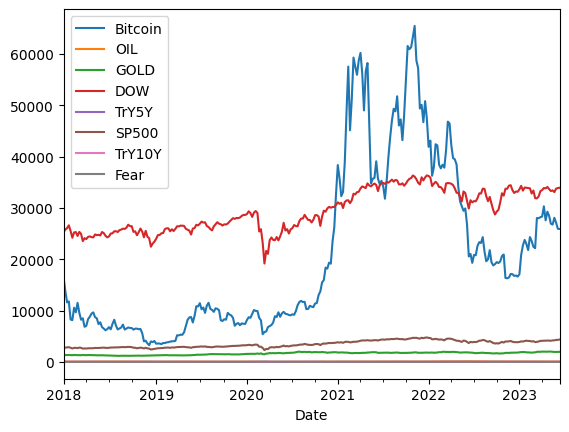

In [5]:
veri.plot.line()

In [6]:
#@title Default percentage of Change
veri/veri.shift()

,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,0.835801,1.046549,1.009922,1.020055,1.026201,1.015708,1.028226,1.101952
2018-01-15,0.842296,0.985537,0.998875,1.010407,1.038298,1.008635,1.035294,1.109252
2018-01-22,1.016052,1.043712,1.014791,1.020903,1.012295,1.022265,1.007576,0.983141
2018-01-29,0.702257,0.989568,0.986756,0.958832,1.052632,0.961453,1.071429,1.562274
...,...,...,...,...,...,...,...,...
2023-05-15,0.993435,1.021559,0.982229,1.003784,1.086957,1.016464,1.066474,0.987082
2023-05-22,1.049781,1.015653,0.982514,0.990029,1.050667,1.003213,1.032520,1.067817
2023-05-29,0.965585,0.987202,1.004269,1.020228,0.974619,1.018291,0.968504,0.813370


### Normalization

In [7]:
#@title ### apply the maximum absolute scaling in Pandas using the .abs() and .max() methods

def maximum_absolute_scaling(veri):
    # copy the dataframe
    veri_scaled = veri.copy()
    # apply maximum absolute scaling
    for column in veri_scaled.columns:
        veri_scaled = veri_scaled / veri_scaled.abs().max()
    return veri_scaled

# call the maximum_absolute_scaling function
veri_scaled = maximum_absolute_scaling(veri)

veri_scaled

,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,0.251694,0.509157,0.654456,0.696121,0.526437,0.575545,0.589074,0.139612
2018-01-08,0.210366,0.532858,0.660950,0.710082,0.540230,0.584586,0.605701,0.153846
2018-01-15,0.177190,0.525151,0.660206,0.717472,0.560920,0.589634,0.627078,0.170654
2018-01-22,0.180035,0.548106,0.669971,0.732470,0.567816,0.602762,0.631829,0.167777
2018-01-29,0.126431,0.542388,0.661098,0.702316,0.597701,0.579527,0.676960,0.262114
...,...,...,...,...,...,...,...,...
2023-05-15,0.408662,0.592939,0.980817,0.919873,0.862069,0.879526,0.876485,0.254543
2023-05-22,0.429006,0.602221,0.963666,0.910701,0.905747,0.882352,0.904988,0.271805
2023-05-29,0.414241,0.594514,0.967780,0.929123,0.882759,0.898491,0.876485,0.221078


<Axes: xlabel='Date'>

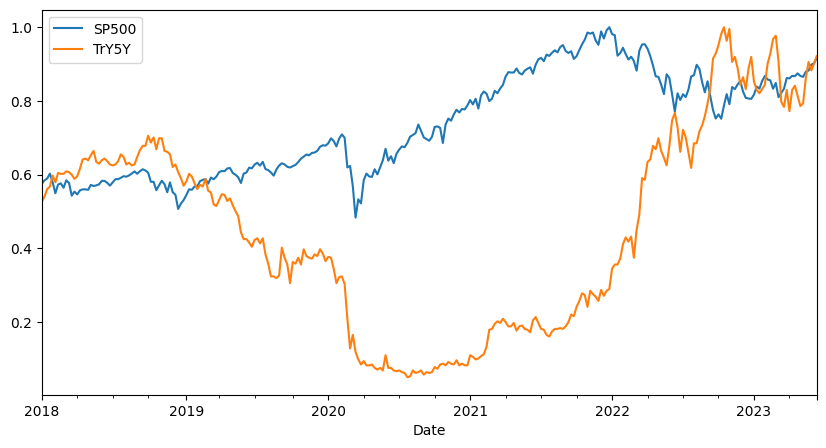

In [21]:
veri_scaled[["SP500","TrY5Y"]].plot(kind='line', figsize=(10, 5))

In [9]:
#@title Standardization
veri_standard = (veri - veri.mean()) / veri.std()
veri_standard

,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,-0.262258,-0.219863,-1.237448,-1.018207,0.262921,-1.143056,0.293271,-1.462851
2018-01-08,-0.427436,-0.071844,-1.185850,-0.893363,0.313850,-1.078382,0.365078,-1.343685
2018-01-15,-0.560031,-0.119976,-1.191758,-0.827282,0.390242,-1.042271,0.457400,-1.202967
2018-01-22,-0.548664,0.023386,-1.114164,-0.693168,0.415707,-0.948361,0.477916,-1.227054
2018-01-29,-0.762907,-0.012325,-1.184668,-0.962815,0.526051,-1.114569,0.672818,-0.437259
...,...,...,...,...,...,...,...,...
2023-05-15,0.365109,0.303382,1.355843,0.982647,1.502179,1.031471,1.534492,-0.500646
2023-05-22,0.446417,0.361348,1.219562,0.900629,1.663452,1.051688,1.657588,-0.356125
2023-05-29,0.387407,0.313215,1.252253,1.065363,1.578571,1.167136,1.534492,-0.780814


<Axes: xlabel='Date'>

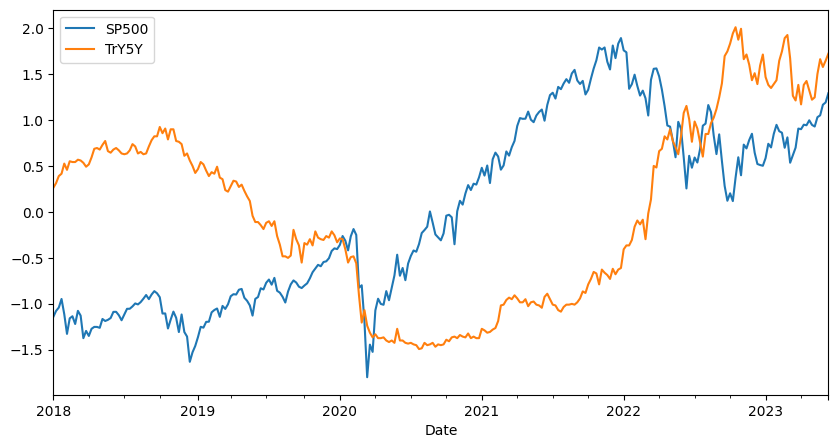

In [19]:
veri_standard[["SP500","TrY5Y"]].plot(kind='line', figsize=(10, 5))

### Log Return

In [11]:
#@title Default comparing each one with Log Return

veri_log_returns=np.log(veri/veri.shift())
veri_log_returns

,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Date,,,,,,,,
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-08,-0.179364,0.045499,0.009873,0.019857,0.025864,0.015586,0.027835,0.097083
2018-01-15,-0.171624,-0.014569,-0.001126,0.010353,0.037583,0.008598,0.034686,0.103686
2018-01-22,0.015924,0.042783,0.014683,0.020688,0.012220,0.022020,0.007547,-0.017003
2018-01-29,-0.353456,-0.010487,-0.013332,-0.042039,0.051293,-0.039309,0.068993,0.446143
...,...,...,...,...,...,...,...,...
2023-05-15,-0.006587,0.021330,-0.017931,0.003777,0.083382,0.016330,0.064358,-0.013003
2023-05-22,0.048581,0.015532,-0.017641,-0.010021,0.049425,0.003208,0.032003,0.065616
2023-05-29,-0.035022,-0.012880,0.004260,0.020026,-0.025708,0.018125,-0.032003,-0.206569


<Axes: xlabel='Date'>

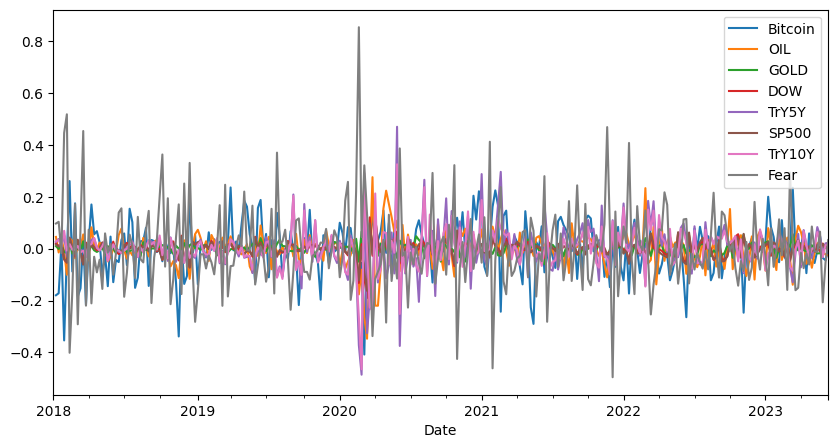

In [12]:
veri_log_returns.plot(kind='line', figsize=(10, 5))

<Axes: xlabel='Date'>

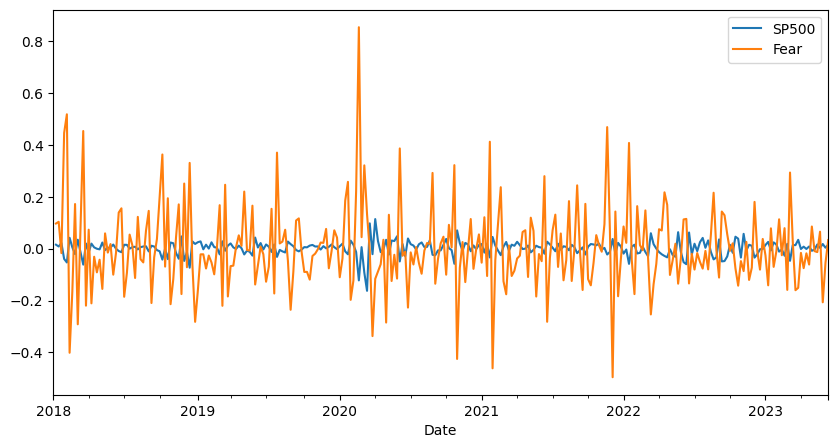

In [23]:
veri_log_returns[["SP500","Fear"]].plot(kind='line', figsize=(10, 5))

# Let's calculate CORRELATION


In [13]:
veri_corr=(veri_log_returns.corr()).round(2)
veri_corr

,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear
Bitcoin,1.00,0.19,0.18,0.21,0.00,0.24,0.01,-0.26
OIL,0.19,1.00,0.16,0.35,0.19,0.33,0.10,-0.34
GOLD,0.18,0.16,1.00,0.27,-0.37,0.27,-0.36,-0.12
DOW,0.21,0.35,0.27,1.00,0.21,0.96,0.16,-0.69
TrY5Y,0.00,0.19,-0.37,0.21,1.00,0.17,0.89,-0.18
SP500,0.24,0.33,0.27,0.96,0.17,1.00,0.13,-0.72
TrY10Y,0.01,0.10,-0.36,0.16,0.89,0.13,1.00,-0.20
Fear,-0.26,-0.34,-0.12,-0.69,-0.18,-0.72,-0.20,1.00


<function matplotlib.pyplot.show(close=None, block=None)>

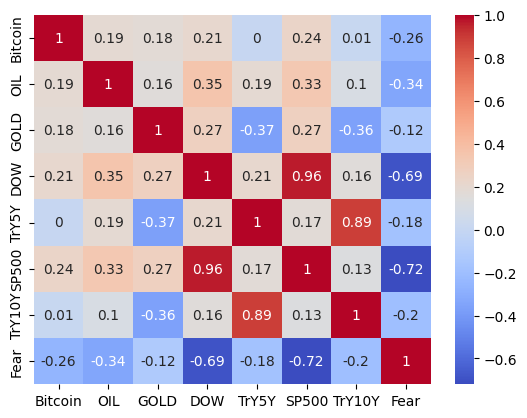

In [14]:
sns.heatmap(veri_corr, annot=True , cmap="coolwarm" , cbar=True)
plt.show

In [17]:
#@title Yeni ticker eklemek ve test correlation yapmak
def test_correlation(ticker):
    df=yf.download(ticker,start )['Adj Close']
    logret=veri_log_returns.copy()
    logret[ticker]=np.log(df/df.shift())
    return logret.corr()
#test_correlation()

In [18]:
test_correlation(['ETH-USD', '^GSPC', 'GBTC'])

[*********************100%***********************]  3 of 3 completed


,Bitcoin,OIL,GOLD,DOW,TrY5Y,SP500,TrY10Y,Fear,ETH-USD,^GSPC,GBTC
Bitcoin,1.000000,0.190138,0.180086,0.213659,0.001621,0.240745,0.013537,-0.262083,0.378271,NaN,NaN
OIL,0.190138,1.000000,0.155572,0.347101,0.194133,0.325847,0.095847,-0.341293,0.143158,NaN,NaN
GOLD,0.180086,0.155572,1.000000,0.271827,-0.371694,0.274467,-0.360847,-0.119473,0.192252,NaN,NaN
DOW,0.213659,0.347101,0.271827,1.000000,0.210632,0.964859,0.160693,-0.687349,0.211866,NaN,NaN
TrY5Y,0.001621,0.194133,-0.371694,0.210632,1.000000,0.170490,0.889569,-0.179864,0.045227,NaN,NaN
SP500,0.240745,0.325847,0.274467,0.964859,0.170490,1.000000,0.132549,-0.718809,0.220930,NaN,NaN
TrY10Y,0.013537,0.095847,-0.360847,0.160693,0.889569,0.132549,1.000000,-0.201099,0.037138,NaN,NaN
Fear,-0.262083,-0.341293,-0.119473,-0.687349,-0.179864,-0.718809,-0.201099,1.000000,-0.141111,NaN,NaN
ETH-USD,0.378271,0.143158,0.192252,0.211866,0.045227,0.220930,0.037138,-0.141111,1.000000,NaN,NaN
^GSPC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
test_correlation('GBTC')

In [ ]:
#@title Visualize Correlation
def visualize_correlation(ticker1, ticker2):
    df=yf.download([ticker1, ticker2],start )
    df=df['Adj Close']
    df=df/df.iloc[0]
    fig, ax=plt.subplots()
    df.plot(ax=ax)

#visualize_correlation()

In [ ]:
visualize_correlation('XRP-USD', 'XLM-USD' )

In [ ]:
visualize_correlation('XRP-USD', 'ADA-USD')

In [ ]:
visualize_correlation('XRP-USD', 'BTC-USD')